In [78]:
import sys
sys.path.append('../..')
import pandas as pd
import src.cleaning as clean
import seaborn as sns
import scipy.stats as stats

In [79]:
sales_data = pd.read_csv('../../data/anon_data.csv')
cleaned_data = clean.clean_data(sales_data)

C:\Users\C\AppData\Local\Temp\ipykernel_7628\1800904834.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('../../data/anon_data.csv')


In [80]:
clean_w_profit_per_quant = cleaned_data.assign(profit_per_item=cleaned_data['profit']/cleaned_data['quantity'])

In [81]:
clean_w_date_quarter = clean_w_profit_per_quant.assign(year_quarter=clean_w_profit_per_quant['ship_date'].dt.to_period('Q'))

In [82]:
grouped_by_sales_team = clean_w_date_quarter.groupby('sales_team_name')

In [103]:
def plot_barplot(data, x: str, y:str, xlabel: str, ylabel: str, title: str, hue: str = None):
    plot = sns.barplot(data, x=x, y=y, hue=hue, orient='v', palette='flare')
    for label in plot.get_xticklabels():
        label.set_rotation(70)
    plot.set(xlabel=xlabel, ylabel=ylabel, title=title)
    plot.grid()
    plot.set_axisbelow(True) 
    return plot

# Sum Profit

<Axes: title={'center': 'Total Profit By Sales Team'}, xlabel='Sales Team', ylabel='Profit (Millons)'>

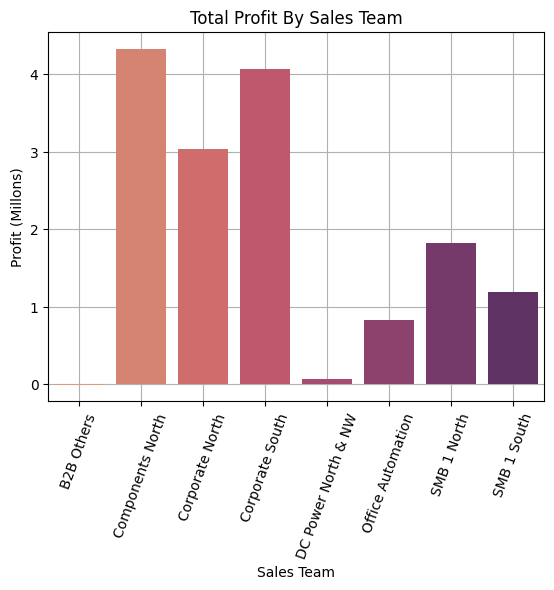

In [104]:
profit_by_sales_team = grouped_by_sales_team['profit'].sum().reset_index(drop=False)
profit_by_sales_team['profit'] = profit_by_sales_team['profit'] / 1_000_000
barplot = plot_barplot(profit_by_sales_team, x='sales_team_name', y='profit', xlabel= 'Sales Team', ylabel='Profit (Millons)', title='Total Profit By Sales Team')
barplot


In [105]:
# Save to image
figure = barplot.get_figure()
figure.savefig('../../images/sales_team_profit/total_profit.png', transparent=True, bbox_inches='tight')

In [125]:
cleaned_data['profit'].sum()

15326016.593493637

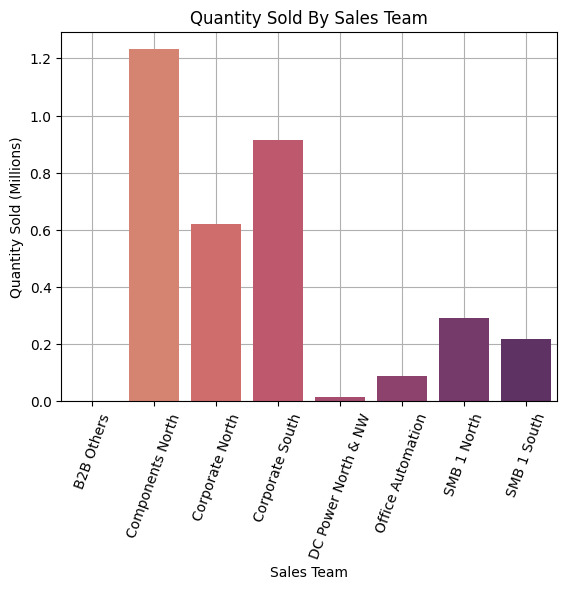

In [129]:
profit_by_sales_team = grouped_by_sales_team['quantity'].sum().reset_index(drop=False)
profit_by_sales_team['quantity'] = profit_by_sales_team['quantity'] / 1_000_000
barplot = plot_barplot(profit_by_sales_team, x='sales_team_name', y='quantity', xlabel= 'Sales Team', ylabel='Quantity Sold (Millions)', title='Quantity Sold By Sales Team')
barplot
figure = barplot.get_figure()
figure.savefig('../../images/sales_team_profit/total_quantity.png', transparent=True, bbox_inches='tight')

# Average Profit By Sales Invoice

<Axes: title={'center': 'Average Profit By Sales Team'}, xlabel='Sales Team', ylabel='Average Profit'>

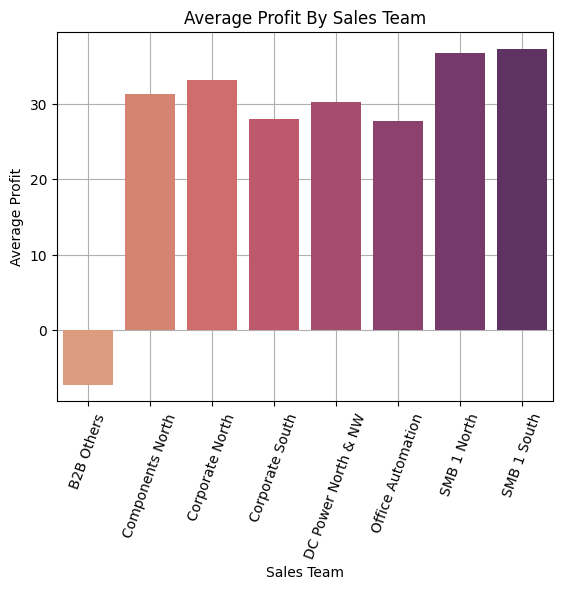

In [106]:
# Average Profit By Sales Invoice
profit_by_sales_team = grouped_by_sales_team['profit'].mean().reset_index(drop=False)
barplot = plot_barplot(profit_by_sales_team, x='sales_team_name', y='profit', xlabel= 'Sales Team', ylabel='Average Profit', title='Average Profit By Sales Team')
barplot


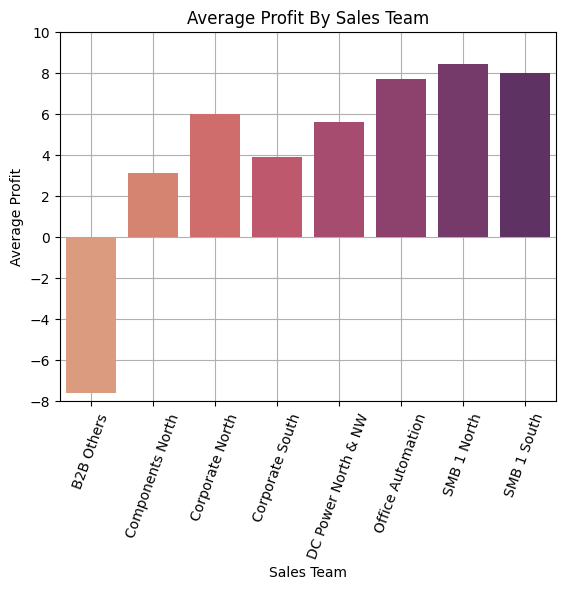

In [107]:
profit_by_sales_team = grouped_by_sales_team['profit'].median().reset_index(drop=False)
barplot = plot_barplot(profit_by_sales_team, x='sales_team_name', y='profit', xlabel= 'Sales Team', ylabel='Average Profit', title='Average Profit By Sales Team')
barplot.set(ylim=(-8, 10))
figure = barplot.get_figure()
figure.savefig('../../images/sales_team_profit/average_profit.png', transparent=True, bbox_inches='tight')


In [108]:
a = {1: 2, 3:4}
list(itertools.product(a, a))

[(1, 1), (1, 3), (3, 1), (3, 3)]

In [109]:
# Test whether the differnce is significant, using 
import itertools
team_list = dict()
b2b = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'B2B Others', 'profit']
team_list.setdefault('b2b', b2b)
comp_north = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'Components North', 'profit']
team_list.setdefault('comp_north', comp_north)
corp_north = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'Corporate North', 'profit']
team_list.setdefault('corp_north', corp_north)
corp_south = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'Corporate South', 'profit']
team_list.setdefault('corp_south', corp_south)
dc_power = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'DC Power North & NW', 'profit']
team_list.setdefault('dc_power', dc_power)
office_auto = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'Office Automation', 'profit']
team_list.setdefault('office_auto', office_auto)
smb_north = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'SMB 1 North', 'profit']
team_list.setdefault('smb_north', smb_north)
smb_south = clean_w_date_quarter.loc[clean_w_date_quarter['sales_team_name'] == 'SMB 1 South', 'profit']
team_list.setdefault('smb_south', smb_south)
cart_prod = list(itertools.product(team_list, team_list))

In [110]:
# Test whether the differnce is significant, using kruskal wallis as by looking at means and medians, data is significantly positively skewed and kruskal wallis is non-parametric 
for team_1, team_2 in cart_prod:
    print(f'{team_1} vs {team_2}')
    print(stats.kruskal(team_list[team_1], team_list[team_2]).pvalue)


b2b vs b2b
1.0
b2b vs comp_north
3.899275054608484e-228
b2b vs corp_north
4.354020115682072e-224
b2b vs corp_south
8.965044805741104e-232
b2b vs dc_power
5.533118280355661e-179
b2b vs office_auto
3.0318133382806456e-238
b2b vs smb_north
3.4772714774973307e-227
b2b vs smb_south
1.1684542904381922e-219
comp_north vs b2b
3.899275054608484e-228
comp_north vs comp_north
1.0
comp_north vs corp_north
0.0
comp_north vs corp_south
7.00284111196635e-50
comp_north vs dc_power
8.532090528759435e-25
comp_north vs office_auto
0.0
comp_north vs smb_north
0.0
comp_north vs smb_south
0.0
corp_north vs b2b
4.354020115682072e-224
corp_north vs comp_north
0.0
corp_north vs corp_north
1.0
corp_north vs corp_south
0.0
corp_north vs dc_power
0.6456690216685541
corp_north vs office_auto
4.863860758192999e-213
corp_north vs smb_north
3.966233897217677e-298
corp_north vs smb_south
4.802939638313084e-138
corp_south vs b2b
8.965044805741104e-232
corp_south vs comp_north
7.00284111196635e-50
corp_south vs corp_nor

In [111]:
print(stats.median_test(b2b, corp_north))

MedianTestResult(statistic=398.71432570932507, pvalue=1.049085526094266e-88, median=5.952535925495818, table=array([[    9, 45951],
       [  425, 45535]], dtype=int64))


In [112]:
# Test medians aswell
for team_1, team_2 in cart_prod:
    print(f'{team_1} vs {team_2}')
    print(stats.median_test(team_list[team_1], team_list[team_2]).pvalue)

b2b vs b2b
1.0
b2b vs comp_north
1.9351543123110648e-84
b2b vs corp_north
1.049085526094266e-88
b2b vs corp_south
1.9899109934268937e-84
b2b vs dc_power
1.1842952573757103e-100
b2b vs office_auto
2.1301075865901986e-90
b2b vs smb_north
6.866001423091742e-90
b2b vs smb_south
2.5469245644230226e-90
comp_north vs b2b
1.9351543123110648e-84
comp_north vs comp_north
1.0
comp_north vs corp_north
0.0
comp_north vs corp_south
1.003090899359056e-120
comp_north vs dc_power
9.660058701120691e-30
comp_north vs office_auto
0.0
comp_north vs smb_north
0.0
comp_north vs smb_south
0.0
corp_north vs b2b
1.0490855260942362e-88
corp_north vs comp_north
0.0
corp_north vs corp_north
1.0
corp_north vs corp_south
0.0
corp_north vs dc_power
0.19137200421793046
corp_north vs office_auto
1.3210467349699063e-86
corp_north vs smb_north
1.4612978303077642e-227
corp_north vs smb_south
4.2839921107456926e-110
corp_south vs b2b
1.9899109934269515e-84
corp_south vs comp_north
1.003090899359056e-120
corp_south vs corp_

In [113]:
# Due to the number of data points, its is safe to say that the differences between sales_teams are significant. 

# Profit Per Item Sold

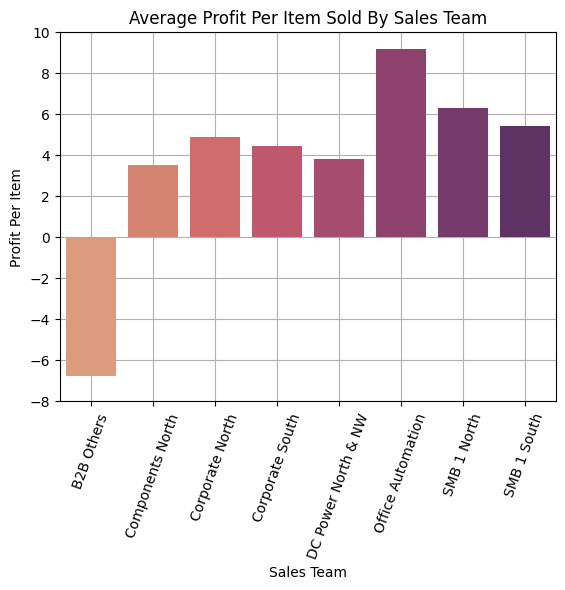

In [114]:
profit_by_sales_team = grouped_by_sales_team['profit'].sum()
quantity_by_sales_team = grouped_by_sales_team['quantity'].sum()
profit_per_item = profit_by_sales_team/quantity_by_sales_team
profit_per_item = profit_per_item.reset_index(drop=False)
profit_per_item.columns = ['sales_team_name', 'profit_per_item']
barplot = plot_barplot(profit_per_item, x='sales_team_name', y='profit_per_item', xlabel= 'Sales Team', ylabel='Profit Per Item', title='Average Profit Per Item Sold By Sales Team')
barplot.set(ylim=(-8, 10))
figure = barplot.get_figure()
figure.savefig('../../images/sales_team_profit/profit_per_item_sold.png', transparent=True, bbox_inches='tight')

# Profit Per Order

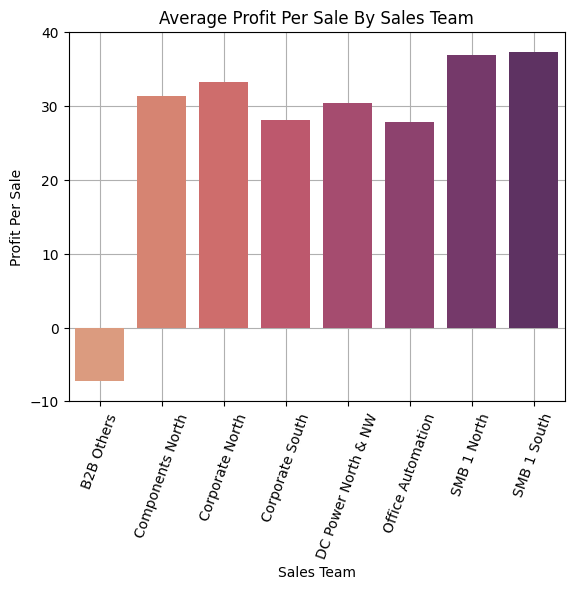

In [115]:
profit_by_sales_team = grouped_by_sales_team['profit'].sum()
sales_by_sales_team = grouped_by_sales_team['sales_order_number'].count()
profit_per_item = profit_by_sales_team/sales_by_sales_team
profit_per_item = profit_per_item.reset_index(drop=False)
profit_per_item.columns = ['sales_team_name', 'profit_per_sale']
barplot = plot_barplot(profit_per_item, x='sales_team_name', y='profit_per_sale', xlabel= 'Sales Team', ylabel='Profit Per Sale', title='Average Profit Per Sale By Sales Team')
barplot.set(ylim=(-10, 40))
barplot
figure = barplot.get_figure()
figure.savefig('../../images/sales_team_profit/profit_per_order.png', transparent=True, bbox_inches='tight')

# Profit Per Quarter

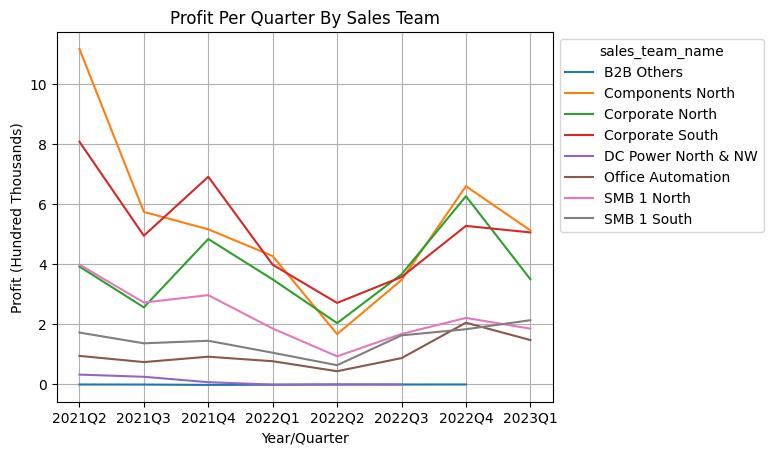

In [122]:
grouped_by_sales_team_quarter = clean_w_date_quarter.groupby(['sales_team_name', 'year_quarter'])
summed_by_team_quarter = grouped_by_sales_team_quarter['profit'].sum().reset_index(level=[0,1], drop=False)
summed_by_team_quarter['profit'] = summed_by_team_quarter['profit']/100_000
summed_by_team_quarter['year_quarter'] = summed_by_team_quarter['year_quarter'].astype(str)
plot = sns.lineplot(data=summed_by_team_quarter, x='year_quarter', y='profit', hue='sales_team_name')
plot.set(xlabel='Year/Quarter', ylabel='Profit (Hundred Thousands)', title='Profit Per Quarter By Sales Team')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))
plot.grid()
plot.set_axisbelow(True) 
figure = plot.get_figure()
figure.savefig('../../images/sales_team_profit/profit_by_quarter.png', transparent=True, bbox_inches='tight')

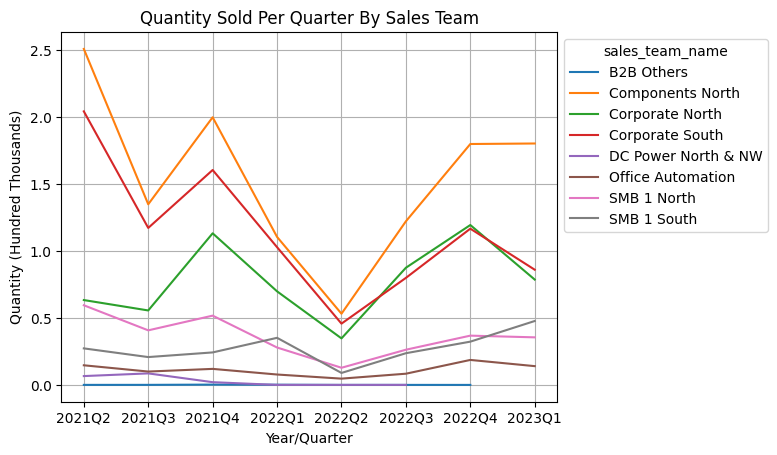

In [130]:
grouped_by_sales_team_quarter = clean_w_date_quarter.groupby(['sales_team_name', 'year_quarter'])
summed_by_team_quarter = grouped_by_sales_team_quarter['quantity'].sum().reset_index(level=[0,1], drop=False)
summed_by_team_quarter['quantity'] = summed_by_team_quarter['quantity']/100_000
summed_by_team_quarter['year_quarter'] = summed_by_team_quarter['year_quarter'].astype(str)
plot = sns.lineplot(data=summed_by_team_quarter, x='year_quarter', y='quantity', hue='sales_team_name')
plot.set(xlabel='Year/Quarter', ylabel='Quantity (Hundred Thousands)', title='Quantity Sold Per Quarter By Sales Team')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))
plot.grid()
plot.set_axisbelow(True) 
figure = plot.get_figure()
figure.savefig('../../images/sales_team_profit/quantity_by_quarter.png', transparent=True, bbox_inches='tight')

# Profit Per Item Per Quarter

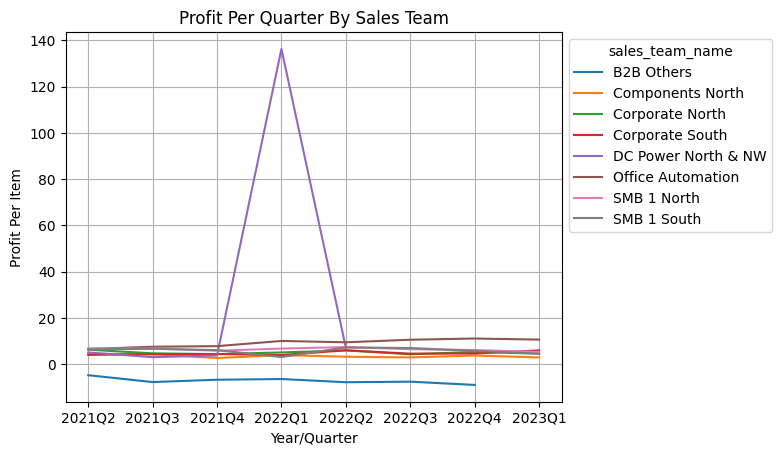

In [120]:
grouped_by_sales_team_quarter = clean_w_date_quarter.groupby(['sales_team_name', 'year_quarter'])
profit_by_sales_team = grouped_by_sales_team_quarter['profit'].sum()
quantity_by_sales_team = grouped_by_sales_team_quarter['quantity'].sum()
profit_per_item = profit_by_sales_team/quantity_by_sales_team
profit_per_item_by_team_quarter = profit_per_item.reset_index(level=[0,1], drop=False)

profit_per_item_by_team_quarter.columns = ['sales_team_name', 'year_quarter', 'profit_per_item']
profit_per_item_by_team_quarter['profit_per_item'] = profit_per_item_by_team_quarter['profit_per_item']
profit_per_item_by_team_quarter['year_quarter'] = profit_per_item_by_team_quarter['year_quarter'].astype(str)
plot = sns.lineplot(data=profit_per_item_by_team_quarter, x='year_quarter', y='profit_per_item', hue='sales_team_name', sizes=(400,400))
plot.set(xlabel='Year/Quarter', ylabel='Profit Per Item', title='Profit Per Quarter By Sales Team')
plot.grid()
plot.set_axisbelow(True) 
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))

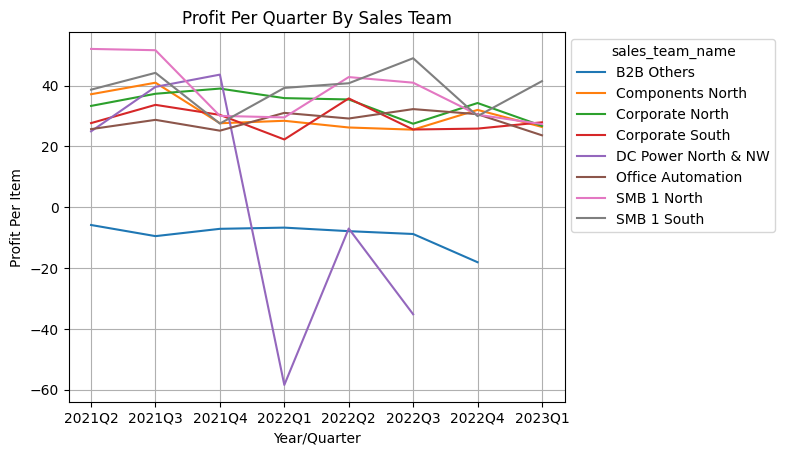

In [119]:
grouped_by_sales_team_quarter = clean_w_date_quarter.groupby(['sales_team_name', 'year_quarter'])
profit_by_sales_team = grouped_by_sales_team_quarter['profit'].sum()
quantity_by_sales_team = grouped_by_sales_team_quarter['quantity'].count()
profit_per_item = profit_by_sales_team/quantity_by_sales_team
profit_per_item_by_team_quarter = profit_per_item.reset_index(level=[0,1], drop=False)

profit_per_item_by_team_quarter.columns = ['sales_team_name', 'year_quarter', 'profit_per_item']
profit_per_item_by_team_quarter['profit_per_item'] = profit_per_item_by_team_quarter['profit_per_item']
profit_per_item_by_team_quarter['year_quarter'] = profit_per_item_by_team_quarter['year_quarter'].astype(str)
plot = sns.lineplot(data=profit_per_item_by_team_quarter, x='year_quarter', y='profit_per_item', hue='sales_team_name', sizes=(400,400))
plot.set(xlabel='Year/Quarter', ylabel='Profit Per Order', title='Profit Per Quarter By Sales Team')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))
plot.grid()
plot.set_axisbelow(True) 
figure = plot.get_figure()
figure.savefig('../../images/sales_team_profit/profit_by_quarter.png', transparent=True, bbox_inches='tight')